#                             Modelado
####                                            ---------------------------------

En este notebook vamos a **Modelar**.


## Librerias de Base

In [ ]:
# Importamos los paquetes que necesitamos para operar

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
 
import warnings

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold

## Imporamos los datos de 1 - DataPrep






In [ ]:
#Y_full = pd.read_csv('https://raw.githubusercontent.com/LStefanuto/Attrition/main/y.csv')
#X_full = pd.read_csv('https://raw.githubusercontent.com/LStefanuto/Attrition/main/X_sinclase.csv')

# prueba con bases que incluyen variables creadas
Y_full = pd.read_csv('https://raw.githubusercontent.com/LStefanuto/Attrition/main/y_v2.csv')
X_full = pd.read_csv('https://raw.githubusercontent.com/LStefanuto/Attrition/main/X_sinclase_v2.csv')

In [ ]:
X = X_full.drop(['NUMERO_DE_CLIENTE'] , axis='columns')

## Re escalado de variables

In [ ]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
# que vaya entre 0 y 1, o sea los valores finales están entre 0 y 1
x_scale = minmax_scale.fit_transform(X)
# transforma el df "X"

## Partición de la muestra

In [ ]:
#Definimos las variables Independientes (X) y la variable dependiente (Y)

Y = Y_full.CLASE_BIN
X = x_scale

In [ ]:
# Particionamos en conjunto de entrenamiento y de testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75 ,stratify = Y, random_state = 55)


## Ensayamos diversos modelos

En un primer momento probamos modelos simples y luego vamos a mejorar cada uno para obtener el modelo que mejor se ajuste a los datos.


************************How to plot a ROC Curve in Python*************************
roc_auc_score for DecisionTree - MaxDepth = 5, Balanced:  0.9499410203479801
roc_auc_score for GradientBoostingClassifier:  0.991949936362864
roc_auc_score for Random Forest:  0.9425495931176472
roc_auc_score for Logistic Regression:  0.8940847225888888


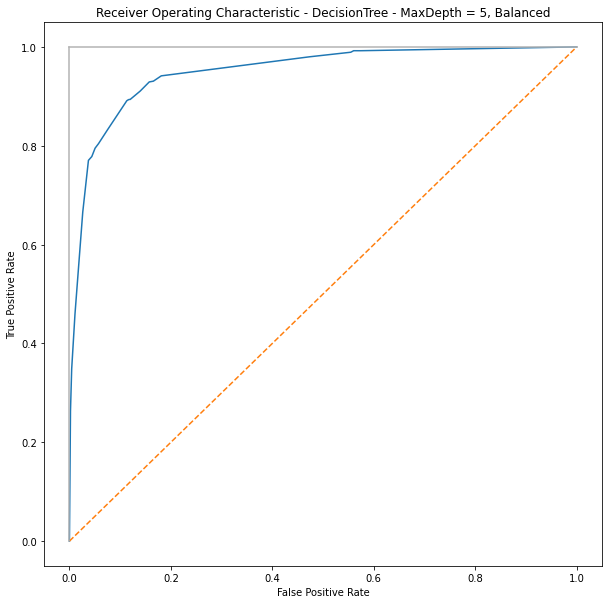

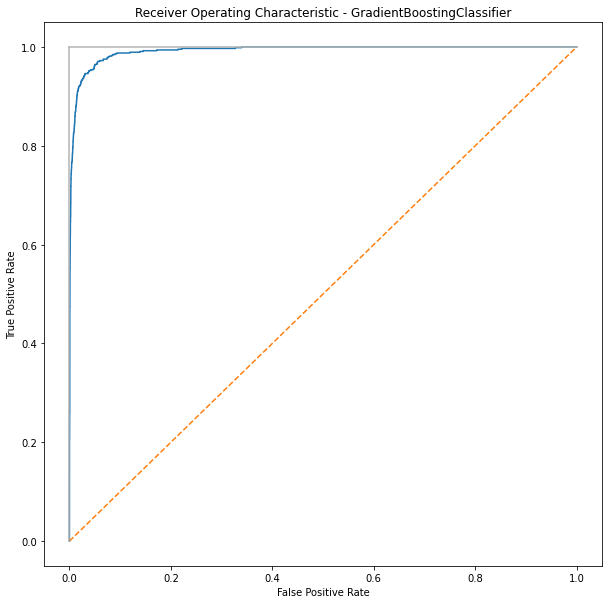

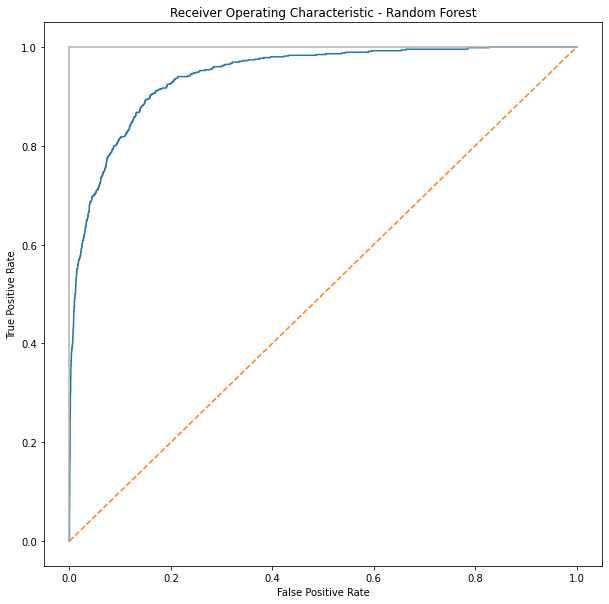

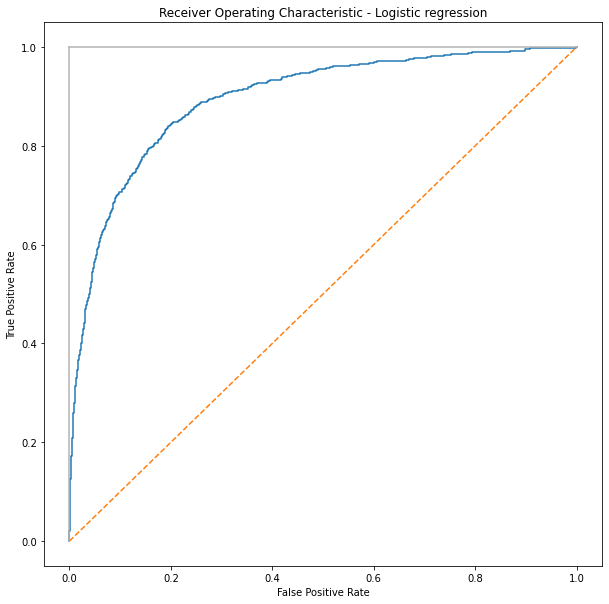

In [ ]:
print()
print(format('How to plot a ROC Curve in Python','*^82'))
warnings.filterwarnings("ignore")

    # Creamos los classifier
clf1 = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
clf2 = GradientBoostingClassifier(n_estimators=100, max_depth=5)
clf3 = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10)
clf4 = LogisticRegression()
 
    # Entrenamos los modelos
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
 
    # Obtenemos las probabilidades predecidas
y_score1 = clf1.predict_proba(X_test)[:,1]
y_score2 = clf2.predict_proba(X_test)[:,1]
y_score3 = clf3.predict_proba(X_test)[:,1]
y_score4 = clf4.predict_proba(X_test)[:,1]
 
    # Ploteamos la curva ROC (Receiving Operating Characteristic)
    # Creamos true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
print('roc_auc_score for DecisionTree - MaxDepth = 5, Balanced: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for GradientBoostingClassifier: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score4))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree - MaxDepth = 5, Balanced')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
 
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - GradientBoostingClassifier')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
 
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
 
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Evaluamos cada modelo

# DecisionTreeClassifier
y_train_pred1 = clf1.predict(X_train)
y_test_pred1 = clf1.predict(X_test)
# GradientBoostingClassifier
y_train_pred2 = clf2.predict(X_train)
y_test_pred2 = clf2.predict(X_test)
# RandomForestClassifier
y_train_pred3 = clf3.predict(X_train)
y_test_pred3 = clf3.predict(X_test)
# LogisticRegression
y_train_pred4 = clf4.predict(X_train)
y_test_pred4 = clf4.predict(X_test)

# DecisionTreeClassifier
print('DecisionTreeClassifier')
print('Accuracy')
print('Train:',accuracy_score(y_train, y_train_pred1))
print('Test:',accuracy_score(y_test, y_test_pred1))
print('Recall')
print('Train:',recall_score(y_train, y_train_pred1))
print('Test:',recall_score(y_test, y_test_pred1))
print('Precision')
print('Train:',precision_score(y_train, y_train_pred1))
print('Test:',precision_score(y_test, y_test_pred1))
print(' ')
print('matriz de confusión en train\n', confusion_matrix(y_train, y_train_pred1))
print('matriz de confusión en test\n', confusion_matrix(y_test, y_test_pred1))

# GradientBoostingClassifier
print(' ')
print('GradientBoostingClassifier')
print('Accuracy')
print('Train:',accuracy_score(y_train, y_train_pred2))
print('Test:',accuracy_score(y_test, y_test_pred2))
print('Recall')
print('Train:',recall_score(y_train, y_train_pred2))
print('Test:',recall_score(y_test, y_test_pred2))
print('Precision')
print('Train:',precision_score(y_train, y_train_pred2))
print('Test:',precision_score(y_test, y_test_pred2))
print(' ')
print('matriz de confusión en train\n', confusion_matrix(y_train, y_train_pred2))
print('matriz de confusión en test\n', confusion_matrix(y_test, y_test_pred2))

# RandomForestClassifier
print(' ')
print('RandomForestClassifier')
print('Accuracy')
print('Train:',accuracy_score(y_train, y_train_pred3))
print('Test:',accuracy_score(y_test, y_test_pred3))
print('Recall')
print('Train:',recall_score(y_train, y_train_pred3))
print('Test:',recall_score(y_test, y_test_pred3))
print('Precision')
print('Train:',precision_score(y_train, y_train_pred3))
print('Test:',precision_score(y_test, y_test_pred3))
print(' ')
print('matriz de confusión en train\n', confusion_matrix(y_train, y_train_pred3))
print('matriz de confusión en test\n', confusion_matrix(y_test, y_test_pred3))

# LogisticRegression
print(' ')
print('LogisticRegression')
print('Accuracy')
print('Train:',accuracy_score(y_train, y_train_pred4))
print('Test:',accuracy_score(y_test, y_test_pred4))
print('Recall')
print('Train:',recall_score(y_train, y_train_pred4))
print('Test:',recall_score(y_test, y_test_pred4))
print('Precision')
print('Train:',precision_score(y_train, y_train_pred4))
print('Test:',precision_score(y_test, y_test_pred4))
print(' ')
print('matriz de confusión en train\n', confusion_matrix(y_train, y_train_pred4))
print('matriz de confusión en test\n', confusion_matrix(y_test, y_test_pred4))


DecisionTreeClassifier
Accuracy
Train: 0.888839045397452
Test: 0.8833266047638272
Recall
Train: 0.912217659137577
Test: 0.8936825885978429
Precision
Train: 0.4351126346718903
Test: 0.420899854862119
 
matriz de confusión en train
 [[18037  2307]
 [  171  1777]]
matriz de confusión en test
 [[5984  798]
 [  69  580]]
 
GradientBoostingClassifier
Accuracy
Train: 0.9876637358693702
Test: 0.9765845781186919
Recall
Train: 0.8973305954825462
Test: 0.8058551617873652
Precision
Train: 0.9588590235874932
Test: 0.9159369527145359
 
matriz de confusión en train
 [[20269    75]
 [  200  1748]]
matriz de confusión en test
 [[6734   48]
 [ 126  523]]
 
RandomForestClassifier
Accuracy
Train: 0.9436120581374484
Test: 0.9403848741757502
Recall
Train: 0.3870636550308008
Test: 0.34822804314329736
Precision
Train: 0.9228886168910648
Test: 0.9186991869918699
 
matriz de confusión en train
 [[20281    63]
 [ 1194   754]]
matriz de confusión en test
 [[6762   20]
 [ 423  226]]
 
LogisticRegression
Accuracy
T

## Buscamos los mejores parámetros para cada modelo para obtener resultados más exactos.

#### 1) Decision Tree Clasifier

In [ ]:
"""
Interpretación de Parametros
---------------------------
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
"""

dtc = DecisionTreeClassifier(
                                class_weight=None,         #dict, list of dicts, “balanced” or None, optional (default=None)
                                criterion='gini',          #default = Gini. The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
                                max_depth=5,               # int or None, optional (default=None)
                                                          #The maximum depth of the tree
                                max_features=None,  #Options: int, float, string, auto, sqrt, log2 or None(default=None)
                                                    #The number of features to consider when looking for the best split:
                                max_leaf_nodes=None,        #int, default=None
                                                            #Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
                                min_impurity_decrease=0.00001,  #float, default=0.0
                                                            #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
                                min_impurity_split=0.05,    #float, default=1e-7
                                                            #Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
                                min_samples_leaf=20, #int, optional (default=1)
                                                     #The minimum number of samples required to be at a leaf node.
                                min_samples_split=2, #int, optional (default=2)
                                                     #The minimum number of samples required to split an internal node
                                min_weight_fraction_leaf=0, #int or None, optional (default=None)
                                                              #Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. If not None then max_depth will be ignored.
                                presort=False,       #bool, optional (default=False)
                                random_state=0,      #int, RandomState instance or None, optional (default=None)
                                splitter='best'      #default = Best. The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split. 
                                                                )


dtc.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=1e-05, min_impurity_split=0.05,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0, presort=False,
                       random_state=0, splitter='best')

In [ ]:
print("""Métodos de evaluación para elección del mejor estimador

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter""")

Métodos de evaluación para elección del mejor estimador

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


In [ ]:
print("""
Interpretación de Parametros
---------------------------
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
""")


Interpretación de Parametros
---------------------------
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



In [ ]:
##TUNNING DE MODELO

dtc_best = DecisionTreeClassifier(class_weight = None, max_features = None, max_leaf_nodes = None) 

##Definimos los parámetros a ser testeados por Random Forest
parameters = {
              'class_weight' : [None],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [4, 5, 6 ],
              'min_impurity_decrease' : [ 0.001, 0.0001, 0.00001],
              'min_impurity_split' : [ 0.001, 0.0001, 0.00001],
              'min_samples_leaf' : [100,0.01],
              'min_samples_split' : [200,0.02],
              'splitter' : ['best', 'random']             }


# Método de evaluación
scoring = {'AUC': 'roc_auc', 'F1': 'f1'} 

# Configuración de parámetros para la búsqueda e instanciación del objeto GridSerch
grid_obj = GridSearchCV(dtc_best, parameters, cv=10, scoring=scoring, refit='AUC', verbose=10, n_jobs = 2) ##Crea un objeto de GridSearch con clasificador y parámetros

# Ajuste y entrenamiento
grid_obj = grid_obj.fit(X_train, y_train)##Correr GridSearch para identificar los mejores parámetros y entrenar el modelo con ellos

# Guardamos el modelo que tiene los mejores parametros
dtc_best = grid_obj.best_estimator_ ##Crear un nuevo clasificador con el mejor resultado anterior de GridSearch

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    3.8s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    4.8s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    6.4s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    7.2s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   10.2s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   12.3s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   13.8s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   16.0s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   18.6s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   20.1s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:   22.5s
[Parallel(

In [ ]:
# Ajustamos el modelo con los parametros óptimos
dtc_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=0.0001,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Verificamos cuales fueron los mejores valores de los parámetros
print ("DecisionTreeClasiffier")
print ("El parámetro 'class_weight' es {} para el modelo óptimo.".format(dtc_best.get_params()['class_weight']))
print ("El parámetro 'criterion' es {} para el modelo óptimo.".format(dtc_best.get_params()['criterion']))
print ("El parámetro 'max_depth' es {} para el modelo óptimo.".format(dtc_best.get_params()['max_depth']))
print ("El parámetro 'min_samples_leaf' es {} para el modelo óptimo.".format(dtc_best.get_params()['min_samples_leaf']))
print ("El parámetro 'min_samples_split' es {} para el modelo óptimo.".format(dtc_best.get_params()['min_samples_split']))

print ("El parámetro 'min_impurity_decrease' es {} para el modelo óptimo.".format(dtc_best.get_params()['min_impurity_decrease']))
print ("El parámetro 'min_impurity_split' es {} para el modelo óptimo.".format(dtc_best.get_params()['min_impurity_split']))
print ("El parámetro 'presort' es {} para el modelo óptimo.".format(dtc_best.get_params()['presort']))
print ("El parámetro 'splitter' es {} para el modelo óptimo.".format(dtc_best.get_params()['splitter']))

print (" ")

##Verificar el F1_Score del modelo calibrado con eldtc_best estimator de GridSearch
print ("El modelo calibrado tiene F1 de {} en el set de entrenamiento.".format(f1_score(y_train, dtc_best.predict(X_train), average='micro')))
print ("El modelo calibrado tiene F1 de {} en el set de prueba.".format(f1_score(y_test, dtc_best.predict(X_test), average='micro')))


DecisionTreeClasiffier
El parámetro 'class_weight' es None para el modelo óptimo.
El parámetro 'criterion' es entropy para el modelo óptimo.
El parámetro 'max_depth' es 6 para el modelo óptimo.
El parámetro 'min_samples_leaf' es 100 para el modelo óptimo.
El parámetro 'min_samples_split' es 200 para el modelo óptimo.
El parámetro 'min_impurity_decrease' es 0.001 para el modelo óptimo.
El parámetro 'min_impurity_split' es 0.0001 para el modelo óptimo.
El parámetro 'presort' es deprecated para el modelo óptimo.
El parámetro 'splitter' es best para el modelo óptimo.
 
El modelo calibrado tiene F1 de 0.9519440609272704 en el set de entrenamiento.
El modelo calibrado tiene F1 de 0.9480293921175684 en el set de prueba.


#### 2) Gradient Boosting Classifier

In [ ]:
# Intentamos mejorar el GradientBoostingClassifier con Randomized Search

gb = GradientBoostingClassifier()

grid = [{"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2], # learning reate del gradiente, es lo que le da sentido al gradient ;)
          "min_samples_split": np.linspace(0.1, 0.5, 12),
          "min_samples_leaf": np.linspace(0.1, 0.5, 12),
          "max_depth":[5,6,8], # prevenimos overfitting
          "max_features":["log2","sqrt"],
          "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0], # super importante! combina features a tomar
          "n_estimators":[10,50,100,250,500,1000] 
         }]
         
search_gb=RandomizedSearchCV(gb,grid,cv=3,n_jobs=-1,scoring="roc_auc",verbose = 10,n_iter = 10)
search_gb.fit(X_train,y_train)

print("AUC:",search_gb.best_score_)
search_gb.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


AUC: 0.953366904125264


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.1,
                           min_samples_split=0.3545454545454546,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

3) Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=50) # itera 50 veces el random forest, normalmente el default es 200
parameters = {'max_features':['sqrt', 'log2', 10],
              'max_depth':[5, 7, 9]} # máxima profundidad, niveles del árbol

clf_grid = GridSearchCV(rf, parameters, n_jobs=-1)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False,
                                              ran

4) KNN, K Neighbors Classifier

In [ ]:
###### Tarda en correr #####

neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
# Definimos el pipeline.
pipe = Pipeline([('knn', neigh)])
 
# Definimos los parámetros a evaluar para encontrar el mejor k.
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}]
 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_train, y_train)
 
clf.best_estimator_.get_params()['knn__n_neighbors']
# Resultado: 10

10

In [ ]:
cv = KFold(shuffle=True)

# for each parameter setting do cross-validation:

for n_neighbors in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,30,40, 50]:
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=n_neighbors), X, Y, cv=cv)
    print("n_neighbors: %d, average score: %f" % (n_neighbors, np.mean(scores)))

n_neighbors: 1, average score: 0.912452
n_neighbors: 2, average score: 0.927751
n_neighbors: 3, average score: 0.925613
n_neighbors: 4, average score: 0.929788
n_neighbors: 5, average score: 0.929888
n_neighbors: 6, average score: 0.931659
n_neighbors: 7, average score: 0.929755
n_neighbors: 8, average score: 0.929888
n_neighbors: 9, average score: 0.929220
n_neighbors: 10, average score: 0.929254
n_neighbors: 15, average score: 0.930055
n_neighbors: 20, average score: 0.929153
n_neighbors: 30, average score: 0.929254
n_neighbors: 40, average score: 0.928552
n_neighbors: 50, average score: 0.927550


# Volvemos a ver la comparativa de modelos con los mejores parámetros posibles


************************How to plot a ROC Curve in Python*************************
roc_auc_score for DecisionTree - MaxDepth = 6, Balanced:  0.9584469494388073
roc_auc_score for GradientBoostingClassifier:  0.9526444058617958
roc_auc_score for Random Forest:  0.961135453723011
roc_auc_score for KNN:  0.8657147375064693


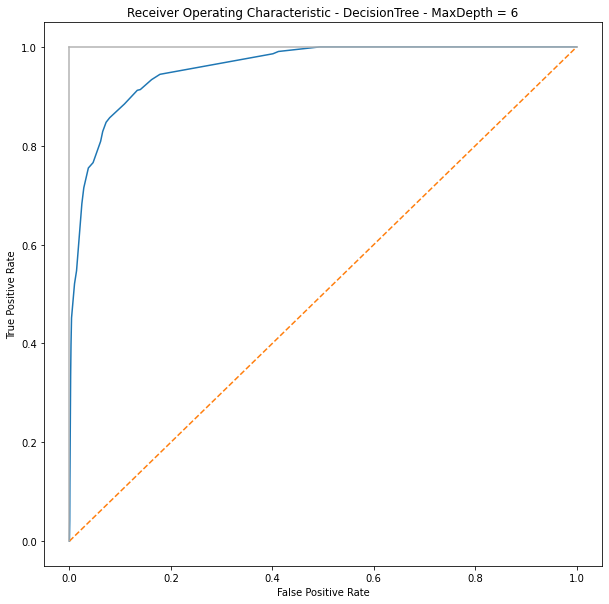

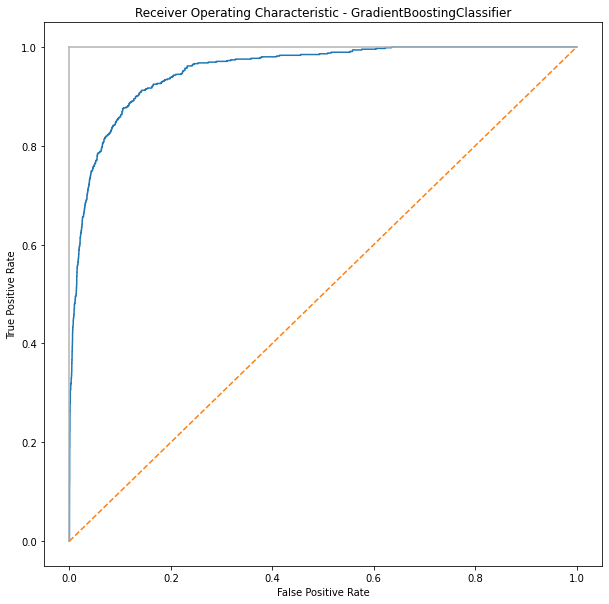

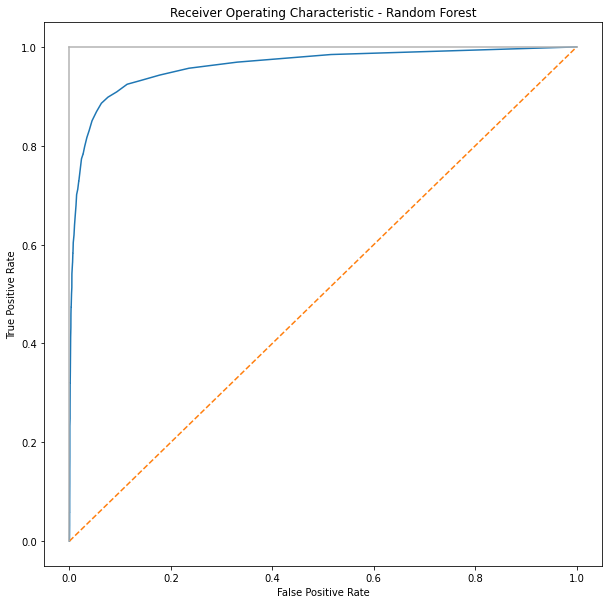

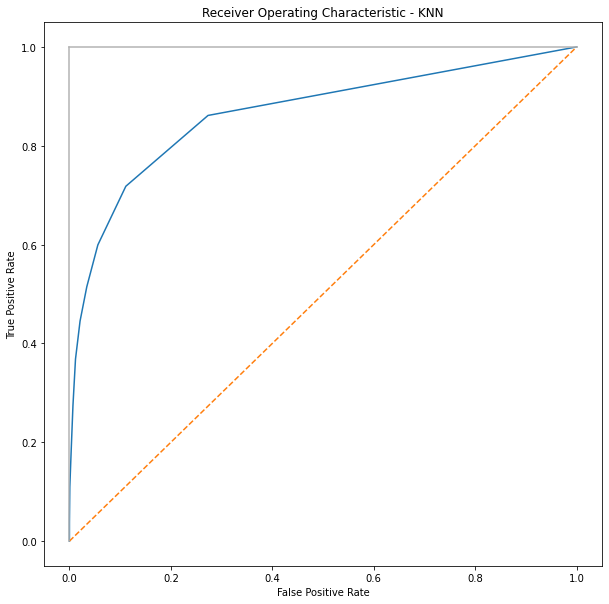

In [ ]:

print()
print(format('How to plot a ROC Curve in Python','*^82'))
warnings.filterwarnings("ignore")

    # Create classifier
clf1 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=0.0001,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf2 = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.1,
                           min_samples_split=0.3545454545454546,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
clf3 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)
clf4 = KNeighborsClassifier(n_neighbors=10)
# GradientBoostingClassifier(n_estimators=100, max_depth=5) # dejo de comparación el modelo que mejor había dado antes
 
    # Train model
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
 
    # Get predicted probabilities
y_score1 = clf1.predict_proba(X_test)[:,1]
y_score2 = clf2.predict_proba(X_test)[:,1]
y_score3 = clf3.predict_proba(X_test)[:,1]
y_score4 = clf4.predict_proba(X_test)[:,1]
 
    # Plot Receiving Operating Characteristic Curve
    # Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
print('roc_auc_score for DecisionTree - MaxDepth = 6, Balanced: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for GradientBoostingClassifier: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score4))
 
    # Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree - MaxDepth = 6')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
 
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - GradientBoostingClassifier')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
 
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
 
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Evaluamos cada modelo

# DecisionTreeClassifier
y_train_pred1 = clf1.predict(X_train)
y_test_pred1 = clf1.predict(X_test)
# GradientBoostingClassifier
y_train_pred2 = clf2.predict(X_train)
y_test_pred2 = clf2.predict(X_test)
# RandomForestClassifier
y_train_pred3 = clf3.predict(X_train)
y_test_pred3 = clf3.predict(X_test)
# KNN
y_train_pred4 = clf4.predict(X_train)
y_test_pred4 = clf4.predict(X_test)

# DecisionTreeClassifier
print('DecisionTreeClassifier Mejorado')
print('Accuracy')
print('Train:',accuracy_score(y_train, y_train_pred1))
print('Test:',accuracy_score(y_test, y_test_pred1))
print('Recall')
print('Train:',recall_score(y_train, y_train_pred1))
print('Test:',recall_score(y_test, y_test_pred1))
print('Precision')
print('Train:',precision_score(y_train, y_train_pred1))
print('Test:',precision_score(y_test, y_test_pred1))
print(' ')
print('matriz de confusión en train\n', confusion_matrix(y_train, y_train_pred1))
print('matriz de confusión en test\n', confusion_matrix(y_test, y_test_pred1))

# GradientBoostingClassifier
print(' ')
print('GradientBoostingClassifier Mejorado')
print('Accuracy')
print('Train:',accuracy_score(y_train, y_train_pred2))
print('Test:',accuracy_score(y_test, y_test_pred2))
print('Recall')
print('Train:',recall_score(y_train, y_train_pred2))
print('Test:',recall_score(y_test, y_test_pred2))
print('Precision')
print('Train:',precision_score(y_train, y_train_pred2))
print('Test:',precision_score(y_test, y_test_pred2))
print(' ')
print('matriz de confusión en train\n', confusion_matrix(y_train, y_train_pred2))
print('matriz de confusión en test\n', confusion_matrix(y_test, y_test_pred2))

# RandomForestClassifier
print(' ')
print('RandomForestClassifier Mejorado')
print('Accuracy')
print('Train:',accuracy_score(y_train, y_train_pred3))
print('Test:',accuracy_score(y_test, y_test_pred3))
print('Recall')
print('Train:',recall_score(y_train, y_train_pred3))
print('Test:',recall_score(y_test, y_test_pred3))
print('Precision')
print('Train:',precision_score(y_train, y_train_pred3))
print('Test:',precision_score(y_test, y_test_pred3))
print(' ')
print('matriz de confusión en train\n', confusion_matrix(y_train, y_train_pred3))
print('matriz de confusión en test\n', confusion_matrix(y_test, y_test_pred3))

# KNN
print(' ')
print('KNN Classifier')
print('Accuracy')
print('Train:',accuracy_score(y_train, y_train_pred4))
print('Test:',accuracy_score(y_test, y_test_pred4))
print('Recall')
print('Train:',recall_score(y_train, y_train_pred4))
print('Test:',recall_score(y_test, y_test_pred4))
print('Precision')
print('Train:',precision_score(y_train, y_train_pred4))
print('Test:',precision_score(y_test, y_test_pred4))
print(' ')
print('matriz de confusión en train\n', confusion_matrix(y_train, y_train_pred4))
print('matriz de confusión en test\n', confusion_matrix(y_test, y_test_pred4))

DecisionTreeClassifier Mejorado
Accuracy
Train: 0.9519440609272704
Test: 0.9480293921175684
Recall
Train: 0.6380903490759754
Test: 0.6163328197226502
Precision
Train: 0.7687074829931972
Test: 0.7407407407407407
 
matriz de confusión en train
 [[20131   374]
 [  705  1243]]
matriz de confusión en test
 [[6696  140]
 [ 249  400]]
 
GradientBoostingClassifier Mejorado
Accuracy
Train: 0.9530574978844698
Test: 0.9500334001336005
Recall
Train: 0.5395277207392197
Test: 0.5115562403697997
Precision
Train: 0.8700331125827815
Test: 0.8534704370179949
 
matriz de confusión en train
 [[20348   157]
 [  897  1051]]
matriz de confusión en test
 [[6779   57]
 [ 317  332]]
 
RandomForestClassifier Mejorado
Accuracy
Train: 0.9997327751302721
Test: 0.9569806279225117
Recall
Train: 0.9974332648870636
Test: 0.5824345146379045
Precision
Train: 0.9994855967078189
Test: 0.8811188811188811
 
matriz de confusión en train
 [[20504     1]
 [    5  1943]]
matriz de confusión en test
 [[6785   51]
 [ 271  378]]
 


Después de varios intentos vemos que el modelo:

# GradientBoostingClassifier(n_estimators=100, max_depth=5)

es el mejor predictor

## Grabamos el modelo

In [ ]:
##########################################################################################################################

In [ ]:
import pickle

Model = GradientBoostingClassifier(n_estimators=100, max_depth=5)

# save the model to disk
filename = '/content/drive/My Drive/Diplomatura - Compartido/finalized_model.sav'
pickle.dump(Model, open(filename, 'wb'))
Model #modelo grabado


FileNotFoundError: ignored

In [ ]:
##########################################################################################################################